C:\Users\justino\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dataset downloaded! Path to files: C:\Users\justino\.cache\kagglehub\datasets\binovi\wholesale-customers-data-set\versions\1
Loading the dataset...
Dataset loaded!
Checking for missing values...
No missing values found.
Excluding 'Channel' and 'Region' columns...
Columns excluded!
Scaling the features...
Features scaled!
Finding the best number of clusters using the Elbow Method...
Plotting the Elbow Curve...


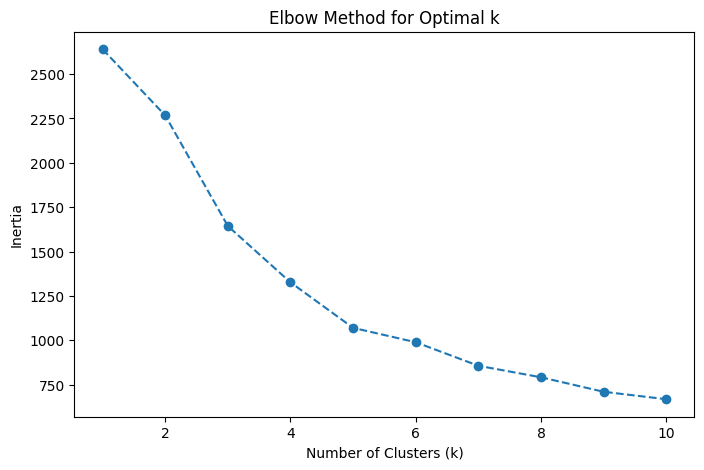

Look at the plot to decide the best number of clusters.
Applying K-Means with 5 clusters...
Clustering complete! Cluster labels added to the dataset.

Inertia values for each k:
k: 1, Inertia: 2640.0
k: 2, Inertia: 2266.955266583245
k: 3, Inertia: 1644.059851234756
k: 4, Inertia: 1326.6746082135528
k: 5, Inertia: 1070.2551995135614
k: 6, Inertia: 989.3326418885056
k: 7, Inertia: 856.7070228388116
k: 8, Inertia: 791.8280762163155
k: 9, Inertia: 710.1943394067517
k: 10, Inertia: 668.22250548469
The updated dataset with cluster labels has been saved as 'Wholesale_Customers_Clustered.csv'.


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import kagglehub

print("Downloading dataset...")
path = kagglehub.dataset_download("binovi/wholesale-customers-data-set")
print("Dataset downloaded! Path to files:", path)


print("Loading the dataset...")
df = pd.read_csv(f"{path}/Wholesale customers data.csv")
print("Dataset loaded!")

# Step 3: Check for missing values and remove them if any
print("Checking for missing values...")
if df.isnull().sum().any():
    print("Missing values found. Dropping them...")
    df.dropna(inplace=True)
else:
    print("No missing values found.")

# Step 4: Exclude the 'Channel' and 'Region' columns
print("Excluding 'Channel' and 'Region' columns...")
df_features = df.drop(['Channel', 'Region'], axis=1)
print("Columns excluded!")

# Step 5: Scale the features so all variables have equal importance
print("Scaling the features...")
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_features)
print("Features scaled!")

# Step 6: Use the Elbow Method to find the best number of clusters
print("Finding the best number of clusters using the Elbow Method...")
inertia = []  # This will store the inertia for each value of k
k_values = range(1, 11)  # Try values of k from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)  # Save the inertia for this k

# Plot the Elbow Curve
print("Plotting the Elbow Curve...")
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()
print("Look at the plot to decide the best number of clusters.")

# Step 7: Apply K-Means with the chosen number of clusters
optimal_k = int(input("Enter the optimal number of clusters based on the Elbow Curve: "))
print(f"Applying K-Means with {optimal_k} clusters...")
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans.fit(scaled_features)

# Add the cluster labels to the original dataset
df['Cluster'] = kmeans.labels_
print("Clustering complete! Cluster labels added to the dataset.")

# Step 8: Print the inertia values for each k
print("\nInertia values for each k:")
for k, inert in zip(k_values, inertia):
    print(f"k: {k}, Inertia: {inert}")

# Optional: Save the updated dataset to a new CSV file
df.to_csv('Wholesale_Customers_Clustered.csv', index=False)
print("The updated dataset with cluster labels has been saved as 'Wholesale_Customers_Clustered.csv'.")
